#  MIDS W207 

## Authors: Neha Kumar, Suhas Gupta
## Submission Data: 04/06/2019 

In [1]:
# General libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# SK-learn libraries for learning.
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline
# Set the figure size for seaborn plots
sns.set(rc={'figure.figsize':(15,10)})

We selected the SF Crime competition

https://www.kaggle.com/c/sf-crime/data

In [2]:
## Import CSV files into pandas data frames

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sampleSubmission.csv')


In [3]:
## Lets look at the train data frame
train[:5]

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [4]:
## Look at the test data frame 
test[:5]

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


(from Kaggle)
## Data fields
- Dates - timestamp of the crime incident
- Category - category of the crime incident (only in train.csv). This is the target variable you are going to predict.
- Descript - detailed description of the crime incident (only in train.csv)
- DayOfWeek - the day of the week
- PdDistrict - name of the Police Department District
- Resolution - how the crime incident was resolved (only in train.csv)
- Address - the approximate street address of the crime incident 
- X - Longitude
- Y - Latitude

The variables we can use to generate the model will need to be in both the train and test dataset. This gives us:
- Dates
- DayOfWeek
- PdDistrict
- Address
- X
- Y

Let us look at a quick summary of the dataset provided by Kaggle to check if there are any missing/NULL values in the data.

In [5]:
print('Training data set')
print('..................')
print(train.info())
print('\nTest data set')
print('..................')
print(test.info())

Training data set
..................
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null object
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB
None

Test data set
..................
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 7 columns):
Id            884262 non-null int64
Dates         884262 non-null object
DayOfWeek     884262 non-null object
PdDistrict    884262 non-null object
Address       884262 non-null object
X             884262 non-null float64
Y             884262 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 47

- The output above shows that there are no missing values in the Kaggle datasets for both training and test data. Thus we do not need to account for missing values in our EDA and model development.

- We can also see from above, that all the variables except geographical coordinates (X,Y) are categorical. Thus we will need to perform feature encoding to enable the use of sklearn's modeling and prediction algorithms.

First let us examine the outcome variable "Category"

[Text(0, 0, 'WARRANTS'),
 Text(0, 0, 'OTHER OFFENSES'),
 Text(0, 0, 'LARCENY/THEFT'),
 Text(0, 0, 'VEHICLE THEFT'),
 Text(0, 0, 'VANDALISM'),
 Text(0, 0, 'NON-CRIMINAL'),
 Text(0, 0, 'ROBBERY'),
 Text(0, 0, 'ASSAULT'),
 Text(0, 0, 'WEAPON LAWS'),
 Text(0, 0, 'BURGLARY'),
 Text(0, 0, 'SUSPICIOUS OCC'),
 Text(0, 0, 'DRUNKENNESS'),
 Text(0, 0, 'FORGERY/COUNTERFEITING'),
 Text(0, 0, 'DRUG/NARCOTIC'),
 Text(0, 0, 'STOLEN PROPERTY'),
 Text(0, 0, 'SECONDARY CODES'),
 Text(0, 0, 'TRESPASS'),
 Text(0, 0, 'MISSING PERSON'),
 Text(0, 0, 'FRAUD'),
 Text(0, 0, 'KIDNAPPING'),
 Text(0, 0, 'RUNAWAY'),
 Text(0, 0, 'DRIVING UNDER THE INFLUENCE'),
 Text(0, 0, 'SEX OFFENSES FORCIBLE'),
 Text(0, 0, 'PROSTITUTION'),
 Text(0, 0, 'DISORDERLY CONDUCT'),
 Text(0, 0, 'ARSON'),
 Text(0, 0, 'FAMILY OFFENSES'),
 Text(0, 0, 'LIQUOR LAWS'),
 Text(0, 0, 'BRIBERY'),
 Text(0, 0, 'EMBEZZLEMENT'),
 Text(0, 0, 'SUICIDE'),
 Text(0, 0, 'LOITERING'),
 Text(0, 0, 'SEX OFFENSES NON FORCIBLE'),
 Text(0, 0, 'EXTORTION'),
 Text(0,

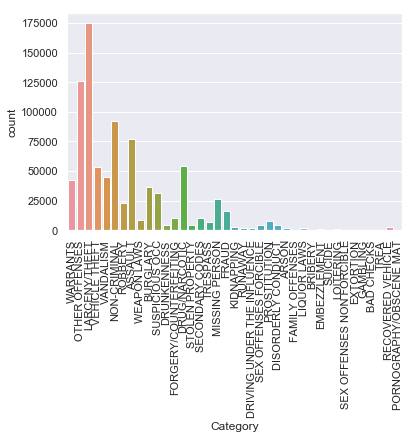

In [6]:
g = sns.countplot(data = train, x = 'Category',orient='h')
g.set_xticklabels(g.get_xticklabels(),rotation=90)

The above plot shows the frequency distribution of the outcome variable **Category**. The distribution might appear to be skewed but this is expected since the outcome variable is categorical and cannot be sorted in a numerical order. We can see that the maximum frequency crime cateogry is **LARCENY/THEFT** followed by **OTHER OFFSENSES** and **NON-CRIMINAL**. Thus if the training data is unbiased and randomly distributed, we can expect a good accuracy score by just predicting outcome of 45% LARCENY, 35% OTHER and 20% NON-CRIMINAL in our test outcome vector. We will later see how this strategy performs as a prediction model.

In [7]:
# Plot freq distributio, box plots and scatter plots of category versus independent variables 

cat_column_list = train.select_dtypes(include = 'object').columns.values
num_column_list = train.select_dtypes(include = 'float64').columns.values

train.describe(include='all')

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
count,878049,878049,878049,878049,878049,878049,878049,878049.000000,878049.000000
unique,389257,39,879,7,10,17,23228,NaN,NaN
top,2011-01-01 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,SOUTHERN,NONE,800 Block of BRYANT ST,NaN,NaN
freq,185,174900,60022,133734,157182,526790,26533,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.422616,37.771020
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030354,0.456893
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.513642,37.707879
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.432952,37.752427
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.416420,37.775421
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.406959,37.784369


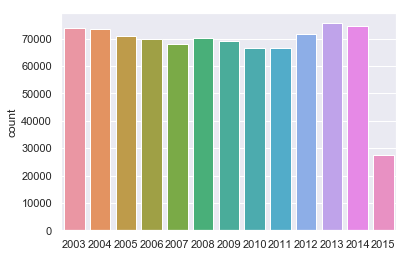

In [8]:
# Look at just the year in the Dates column
year_vals = (train['Dates'].str.split('-').str[0]).values
(np.unique(year_vals))
g = sns.countplot(year_vals)

All the years appear to be evenly distributed in the data set, i.e. there is no distinction boundary apparent in the crime categories from just the year data.

In [9]:
class createTestTrainData:
    '''
        Parameters: 
            trainDataFrame: Pandas DF containing training data
            testDataFrame: Pandas DF containing test data
            outcome : [String] Predicted variable name in the data frame
            removeCategories: [List] Categories to be removed from the training data frame to match test data shape
            trainDataEncoded: Numpy data array containing encoded feature set for training data
            trainlabelsEncoded: Numpy data array containing encoded dataset for training labels
            mini_size: Size of the mini training data and label set to create
            r_seed: Random seed for test train split 
            t_size: Size of dev dataset
            shuffle: Boolean indicating shuffling of data for test train split
            
        Methods: 
            getDataSets(): Converts the pandas data frames for test and training data to numpy arrays for modeling
            testTrainSplit(): Splits dataset into training and development data sets         

    '''
    def __init__(self,trainDataFrame=pd.DataFrame(),testDataFrame=pd.DataFrame(),outcome='Category',
                 removeCategories=['Category','Descript','Resolution'],
                 trainDataEncoded=[],trainlabelsEncoded=[], 
                 mini_size = 1000, r_seed = 1, t_size = 0.20, shuffle=True):
        
        # Parameters for data set creation
        self._trainDataFrame = trainDataFrame
        self._testDataFrame = testDataFrame
        self._remCats = removeCategories  # categories to remove from the training and fitting datasets
        self._labelCat = outcome # define the outcome category
        
        # Parameters for test train data split
        self._r_seed = r_seed
        self._shuffle = shuffle
        self._t_size = t_size
        self._mini_size = mini_size
        self._encodedData = trainDataEncoded
        self._encodedLabels = trainlabelsEncoded
        
    def getDataSets(self):
        """ Process pandas dataframe and return numpy arrays """
        
        data_train_df = self._trainDataFrame.drop(self._remCats,axis=1)
        labels_train_df = pd.DataFrame(self._trainDataFrame, columns = [self._labelCat])

        ## Replace Dates column by just its year numbers
        #data_train_df['Dates'] =  (train['Dates'].str.split('-').str[0]).values

        ## Convert data frame to numpy arrays
        data_train = data_train_df.values
        labels_train = labels_train_df.values
        ## Store the feature names in a list
        train_features_names = list(data_train_df.keys())
        ## Remove ID column from test data
        test_data = self._testDataFrame.drop(['Id'],axis=1).values
        
        return data_train,labels_train,test_data,train_features_names
    
    def testTrainSplit(self):
        """ Split into training, dev and mini training data sets """
        train_data, dev_data, train_labels, dev_labels = train_test_split(self._encodedData, self._encodedLabels,test_size = self._t_size, random_state = self._r_seed,shuffle=self._shuffle)
        mini_train_data, mini_train_labels = train_data[:self._mini_size], train_labels[:self._mini_size]
        return train_data, dev_data, mini_train_data, train_labels, dev_labels, mini_train_labels
    

In [10]:
# Define a data pre processing class

class featureProcessor:
    '''
        Parameters: 
            dataset: Numpy array containing data with features and samples 
            encode: Boolean indicating encoding of data
            encodeScheme: String value indicating scheme to use for encoding 
 
        Methods: 
            encodeData(): Encodes the data using encodeScheme and returns transformed datasets
            encodeLabels(): Encodes the labels using encodeScheme and returns transformed label sets and class names

    '''
    
    def __init__(self,dataset,labelset,encode=0,dataencodeScheme='oneHot',labelEncodeScheme='label'):
        """Create a new instance of the preprocessing object
        Parameters: 
            dataset: Dataframe containig the data to be processed 
            encode : Binary [1: encode based on encodeScheme ; 0 : no encoding]
        """
        self._dataset = dataset
        self._labelset = labelset
        self._encode = encode
        self._dataEncodeScheme = dataEncodeScheme
        self._labelEncodeScheme = labelEncodeScheme
        self._dataencoders = {'oneHot': preprocessing.OneHotEncoder(),
                          'ordinal': preprocessing.OrdinalEncoder()
                         }
        self._labelencoders = {'label': preprocessing.LabelEncoder(),
                          
                         }
        
        ## Test for argument fidelity
        if (self._encode and (self._dataEncodeScheme=="NULL" or self._labelEncodeScheme=="NULL")):
            raise ValueError("encode schemes for data or labels can't be NULL when encode !=0")     
        if (self._dataEncodeScheme not in self._dataencoders):
            raise ValueError("{fm} is not a valid encoding scheme defined in featureProcessor".format(fm=self._dataEncodeScheme))
        if (self._labelEncodeScheme not in self._labelencoders):
            raise ValueError("{fm} is not a valid encoding scheme defined in featureProcessor".format(fm=self._labelEncodeScheme))

    def encodeData(self):
        '''Suhas : Fix X & Y encoding by removing them from one hot encoder'''
        """Encodes the data set based on chosen scheme"""    
        enc = self._dataencoders[self._dataEncodeScheme]
        # Encode independent variable data        
        if self._encode:
            transformedDataset = enc.fit_transform(self._dataset)
        else:
            transformedDataset = self._dataset
        return transformedDataset
    
    def encodeLabels(self):        
        # Encode label data
        enc = self._labelencoders[self._labelEncodeScheme]
        if self._encode:
            transformedLabelset = enc.fit_transform(np.ravel(self._labelset.reshape(-1,1)))
            data_classes = enc.classes_
        else:
            transformedLabelset = self._labelset
            data_classes = np.unique(transformedLabelset)
        return transformedLabelset,data_classes
        
        

In [11]:
''' Import the data frames into numpy arrays and remove extraneous categories 
    Outcome Variable: Category [This is what we will predict and it forms a separate array]
'''
removeCats = ['Category','Descript','Resolution']
outcomeLabel = 'Category' 
importdata = createTestTrainData(trainDataFrame=train,testDataFrame=test,outcome=outcomeLabel,removeCategories=removeCats)
data_train,labels_train,test_data,train_features_names = importdata.getDataSets()

# Check shape of all arrays
print('Shape of training data: {train_shp1}'.format(train_shp1=data_train.shape))
print('Shape of training labels: {train_shp2}'.format(train_shp2=labels_train.shape))
print('List of pruned training features:', train_features_names)
print('Shape of test data:', test_data.shape)

Shape of training data: (878049, 6)
Shape of training labels: (878049, 1)
List of pruned training features: ['Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y']
Shape of test data: (884262, 6)


In [12]:

''' Encoded data using one Hot Encoding'''
dataEncodeScheme = 'oneHot' # use one Hot scheme
labelEncodeScheme  = 'label' # use label encoder (category to ordered numeric)
encode = 1  # to encode or not to encode
fp = featureProcessor(data_train,labels_train,encode,dataEncodeScheme,labelEncodeScheme)               
data_train_encoded = fp.encodeData()
labels_train_encoded, data_classes = fp.encodeLabels()
print(data_classes[:5])

'''Split data in train, dev and mini_train dataset for training and validating models'''
random_seed = 1
dev_size = 0.20 # Set dev data set size to 20%
shuffle = True # Shuffle the data based on random seed
mini_dataset_size = 1000
splitData = createTestTrainData(trainDataEncoded = data_train_encoded,trainlabelsEncoded=labels_train_encoded, 
                 mini_size = mini_dataset_size, r_seed=random_seed, t_size = dev_size, shuffle=shuffle)
train_data, dev_data, mini_train_data, train_labels, dev_labels, mini_train_labels = splitData.testTrainSplit()

# Check shapes of all arrays
print(labels_train_encoded.shape)
print(data_classes.shape)
print(dev_data.shape)
print(train_data.shape)
print(mini_train_data.shape)

['ARSON' 'ASSAULT' 'BAD CHECKS' 'BRIBERY' 'BURGLARY']
(878049,)
(39,)
(175610, 480988)
(702439, 480988)
(1000, 480988)


In [ ]:
best_c = 0.1
best_solver = 'saga'
tol = 0.01
iterations = 10
penalty = 'l1'
multiclass = 'multinomial'

lr_l1_optimized = LogisticRegression(C = best_c, solver=best_solver,penalty=penalty, multi_class=multiclass,  
                                     random_state = random_seed, max_iter=iterations, tol = tol,n_jobs=-1)
pred_labels = lr_l1_optimized.fit(train_data, train_labels).predict(dev_data)
l1_score = metrics.f1_score(dev_labels, pred_labels, average = 'micro')
print('The F1 score for a Logistic Regression model (using L1 errors) is %s'% (l1_score))

In [205]:
# baseline model is just a knn of 1 for just latitude and longitude
neighbors = 1
kn = KNeighborsClassifier(n_neighbors=neighbors, n_jobs=-1)
kn.fit(train_data, train_labels)

# Create predicted values
#preds_dev = kn.predict(dev_data)
score = kn.score(dev_data, dev_labels)
#proba = kn.predict_proba(dev_data)

print('Mean score from KNN with {nn} neighbors: {score}'.format(nn=neighbors, score=score))

ValueError: could not convert string to float: '2006-06-04 18:30:00'

In [9]:
## Run predictions on test data (need to encode before using)
test_data_encoded = test_data
for k in range(test_data.shape[1]):
    test_data_encoded[:,k] = enc.fit_transform(np.ravel(test_data[:,k].reshape(-1,1)))
preds = kn.predict(test_data_encoded)

In [10]:
## Print formatted output for submission CSV

# Looking at format of output
#print(sample_submission.head())
print('sample submission shape', sample_submission.shape)

# Now put results in a dataframe 
all_ids = test["Id"].values

# From encoded categories, get normal labels
labeled_preds = [data_classes[i] for i in preds]

# Make dateframe
d = {'Id': all_ids, 'Label': labeled_preds}

# Make the results dummy columns
df = pd.DataFrame(data = d)
results = pd.get_dummies(df, prefix=[''],prefix_sep = '')

# To ensure we have all columns, copy data into the schema of sample_submission
submission = pd.DataFrame().reindex_like(sample_submission).fillna(0).astype(int)

col_names = list(results.columns.values)
for col in col_names:
    submission[col] = results[col]

    
print('final shape',submission.shape )
## Save the predictions to submission CSV file
submission.to_csv('baseline_submission.csv', index = False)

#print(submission)

sample submission shape (884262, 40)
final shape (884262, 40)
